In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from alrd.run_spot import SessionBuffer, DataBuffer, TransitionData, StateData
from alrd.spot_gym.model.robot_state import SpotState

"""
Analyse transitions.

"""

file_path = "/home/bhoffman/Documents/MT FS24/active-learning-dynamics/collected_data/test20240705-142837/session_buffer.pickle"
with open(file_path, 'rb') as file:
    data = pickle.load(file)

transitions = data.data_buffers[0].transitions
states = data.data_buffers[0].states

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


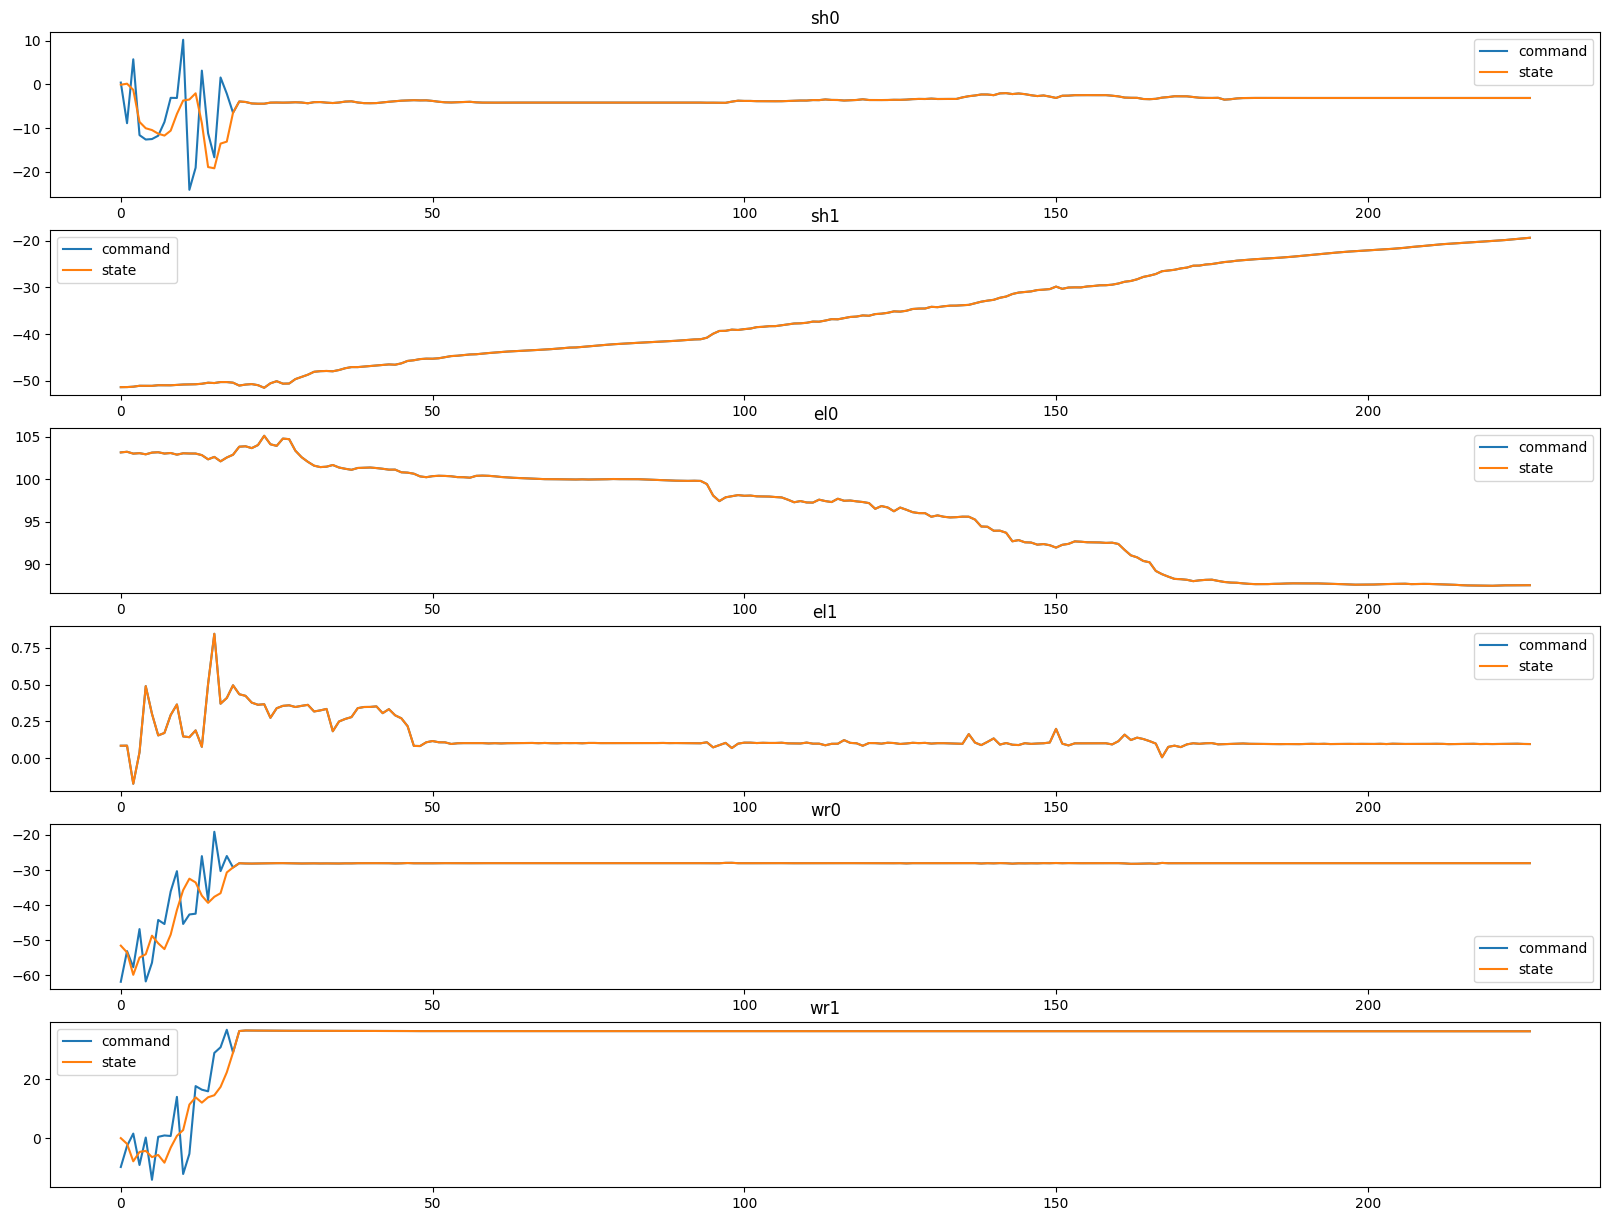

In [2]:
# command tracking analysis for arm joint commands

# get arm joint commands
arm_joint_commands = [transition.cmd.commanded_arm_joint_positions for transition in transitions]
command_steps = [transition.step for transition in transitions]

# get arm joint states
arm_joint_states = [state.last_state.arm_joint_positions for state in states]
state_steps = [state.step for state in states]


# plot seperately in subplot for each joint (sh0, sh1, el0, el1, wr0, wr1)
fig, axs = plt.subplots(6, 1, figsize=(20, 15))
joint_names = ["sh0", "sh1", "el0", "el1", "wr0", "wr1"]
for i in range(6):
    axs[i].plot(command_steps, [np.rad2deg(command[i]) for command in arm_joint_commands], label="command")
    axs[i].plot(state_steps, [np.rad2deg(state[i]) for state in arm_joint_states], label="state")
    axs[i].set_title(joint_names[i])
    axs[i].legend()

plt.show()

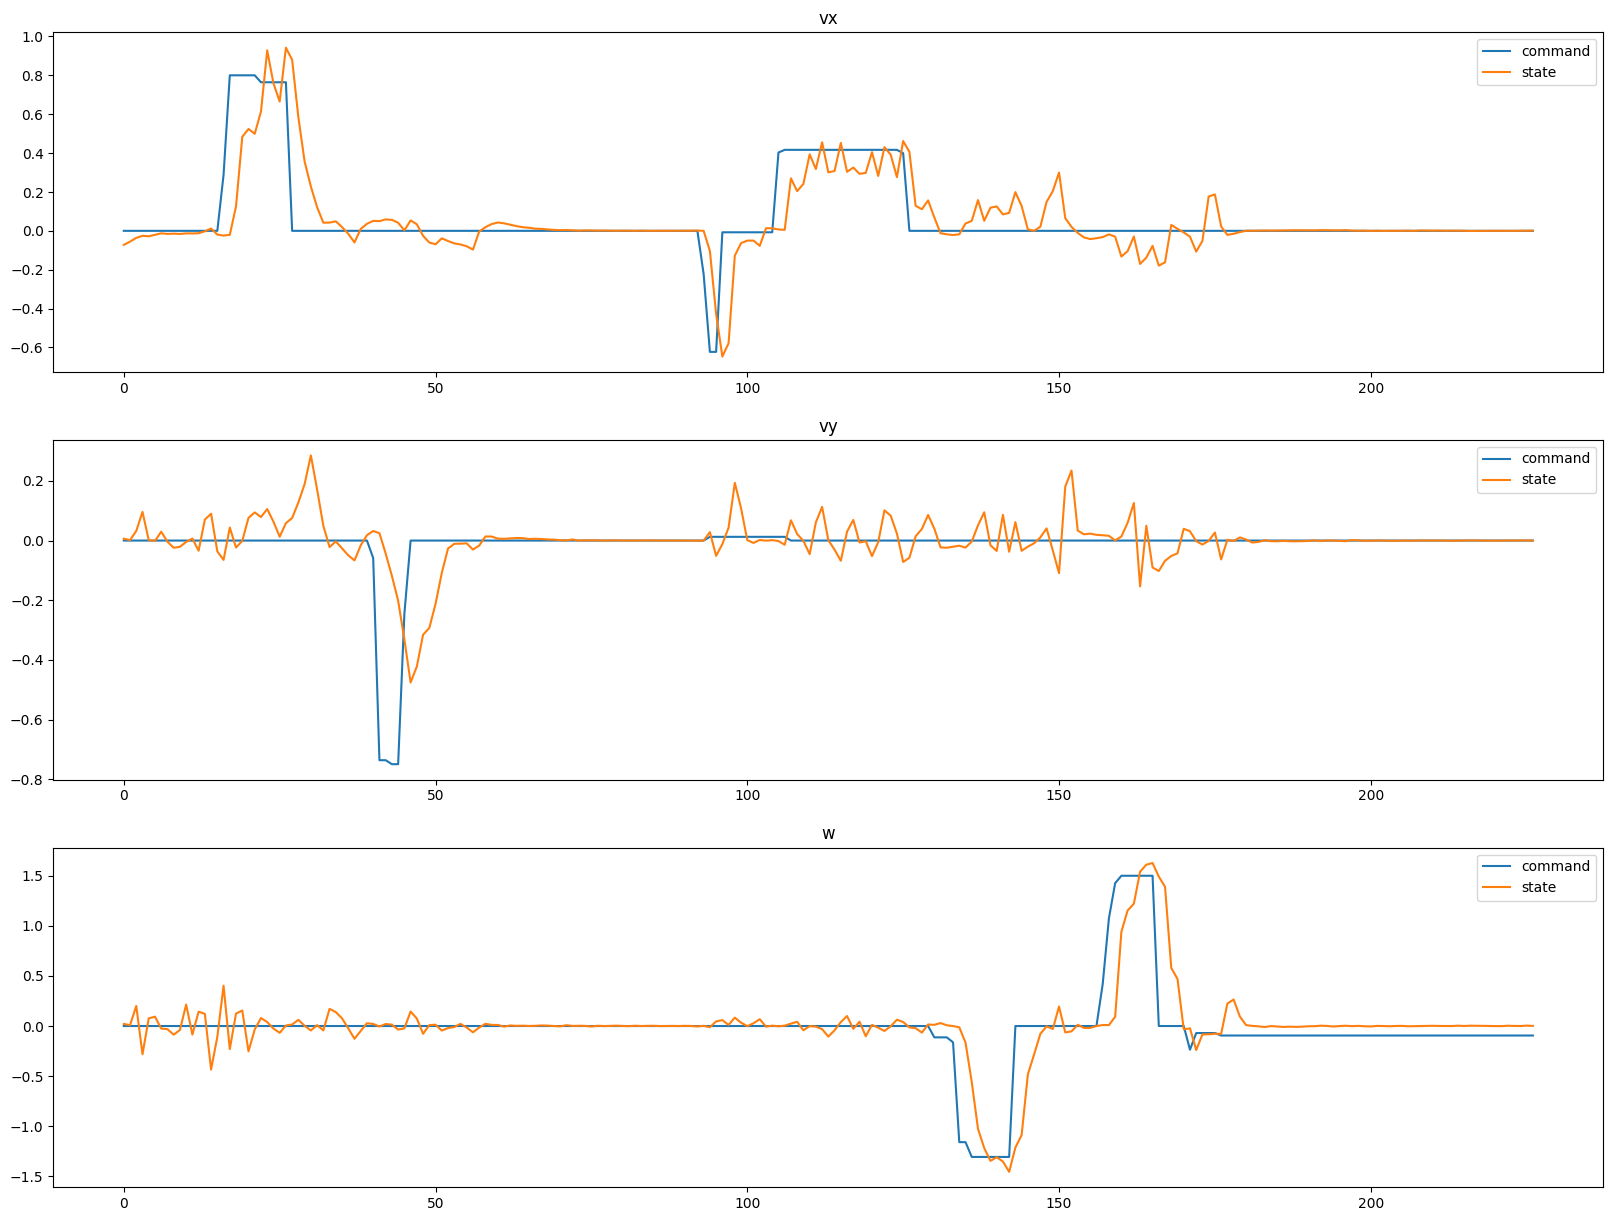

In [3]:
# command tracking analysis for body commands

# get body commands
body_commands = [[transition.cmd.vx, transition.cmd.vy, transition.cmd.w] for transition in transitions]
command_steps = [transition.step for transition in transitions]

# get body states
body_states = [[state.last_state.velocity_of_body_in_vision[0], state.last_state.velocity_of_body_in_vision[1], state.last_state.velocity_of_body_in_vision[5]] for state in states]
state_steps = [state.step for state in states]

# plot seperately in subplot for vx, vy, w
fig, axs = plt.subplots(3, 1, figsize=(20, 15))
body_names = ["vx", "vy", "w"]
for i in range(3):
    axs[i].plot(command_steps, [command[i] for command in body_commands], label="command")
    axs[i].plot(state_steps, [state[i] for state in body_states], label="state")
    axs[i].set_title(body_names[i])
    axs[i].legend()

plt.show()

In [4]:
# test forward kinematics

from alrd.spot_gym.utils.spot_arm_fk import SpotArmFK

spot_arm_fk = SpotArmFK()

# get arm joint positions
arm_joint_positions = [state.last_state.arm_joint_positions for state in states]
state_steps = [state.step for state in states]

# get gt arm end effector positions
gt_ee_positions = [[state.last_state.pose_of_hand[0], state.last_state.pose_of_hand[1], state.last_state.pose_of_hand[2]] for state in states]

# get fk arm end effector positions
fk_ee_positions_cs = [spot_arm_fk.get_ee_position([arm_joint_position[0], arm_joint_position[1], arm_joint_position[2], 0.0, arm_joint_position[3], arm_joint_position[4], arm_joint_position[5]]) for arm_joint_position in arm_joint_positions]
fk_ee_positions = np.array([dm.full().flatten() for dm in fk_ee_positions_cs])

AssertionError: Must provide 6 joint states

NameError: name 'fk_ee_positions' is not defined

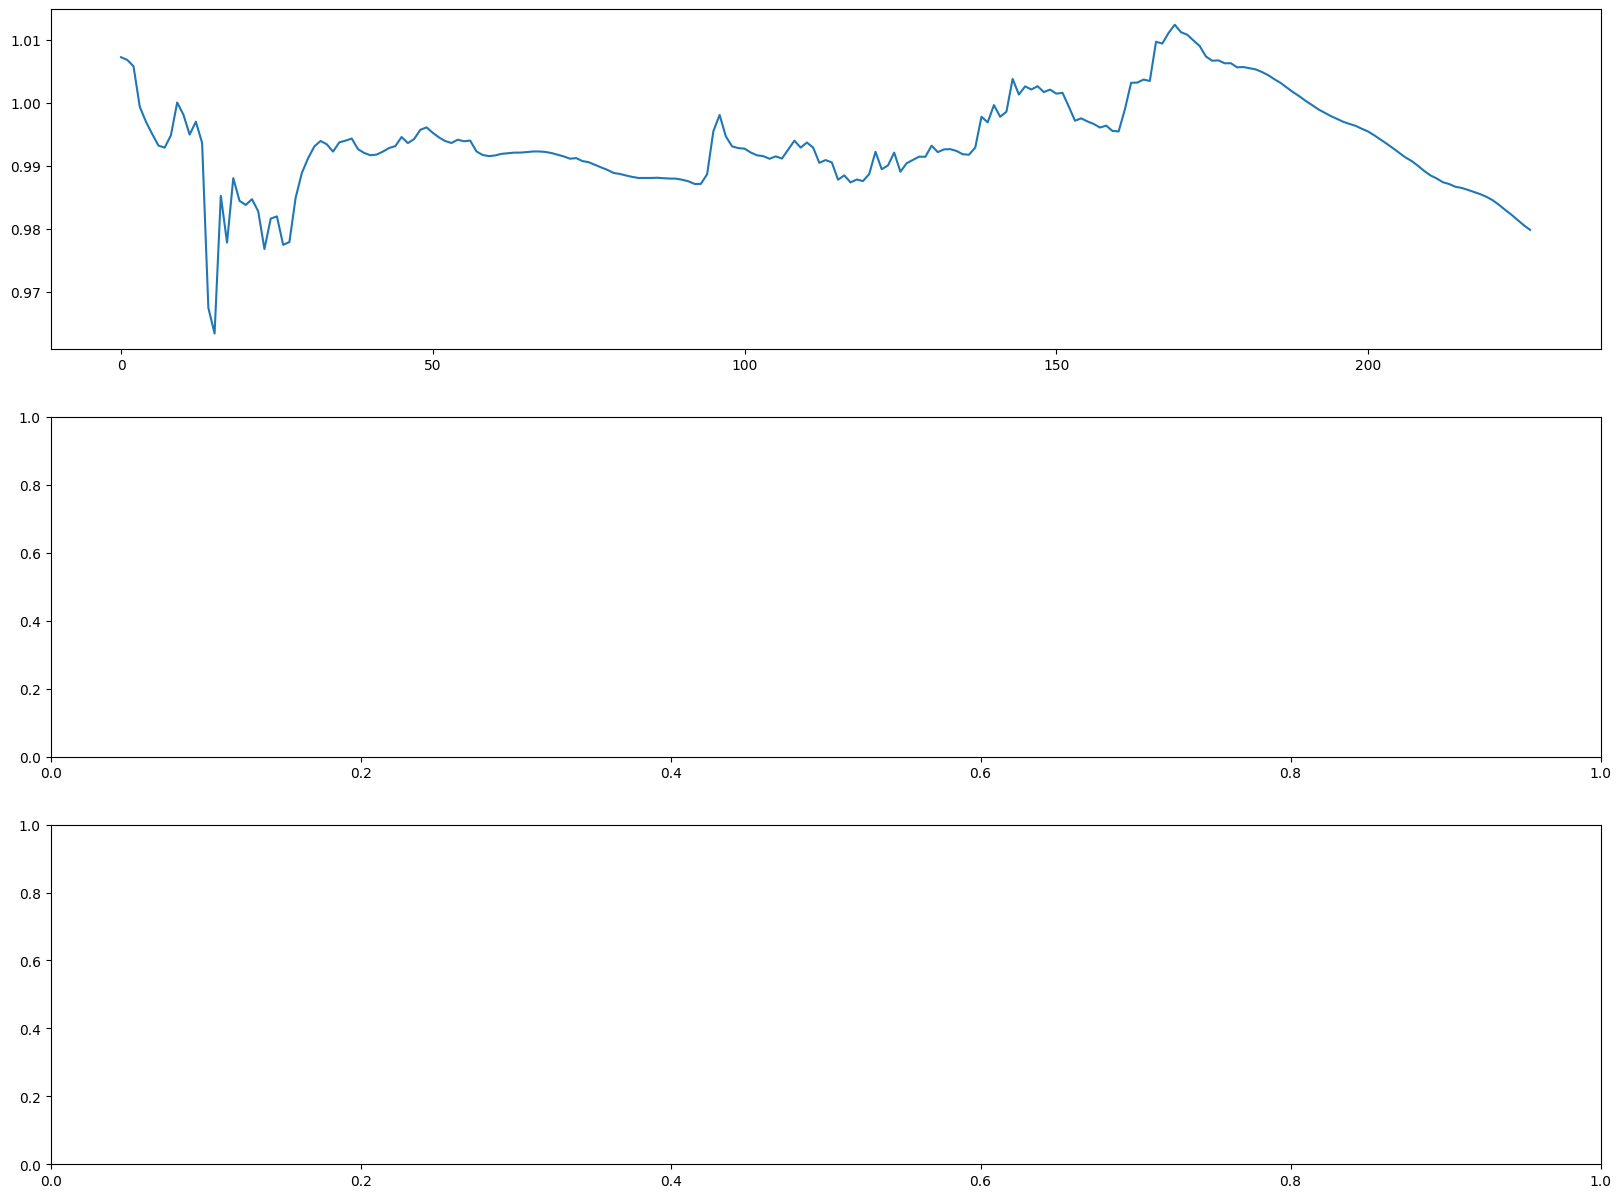

In [5]:
# plot the fk and gt end effector positions
fig, axs = plt.subplots(3, 1, figsize=(20, 15))
ee_names = ["x", "y", "z"]
for i in range(3):
    axs[i].plot(state_steps, [gt_ee_position[i] for gt_ee_position in gt_ee_positions], label="gt")
    axs[i].plot(state_steps, [fk_ee_position[i] for fk_ee_position in fk_ee_positions], label="fk")
    axs[i].set_title(ee_names[i])
    axs[i].legend()

plt.show()